# Code Assigment 2

Using the algorithms of Linear Regression, Logistic Regression, Soft Margin - Support Vector Machine, Decision Trees, and K-Nearest Neighbors, answer the questions 5 and 6 from the Code Assigment 1.

*Note: To answer these questions, we will be using the scikit-learn implementation for these models.*

# Solution
## Importing data sets
### Data set 1: Banknote Authentication Data Set

In [1]:
import pandas as pd
df1 = pd.read_pickle("./data/banknote_authentication/data_banknote_authentication.pkl")  

In [2]:
# Set data values
X_1 = df1.copy().iloc[:, :-1].values # All data samples attributes
y_1 = df1.copy().iloc[:, -1].values # All data samples classes

train_ratio = 0.80
test_ratio = 0.10
validation_ratio = 0.10

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=test_ratio, random_state=0)

X_train_1, X_valid_1, y_train_1, y_valid_1 = train_test_split(X_train_1, y_train_1, 
                                                              test_size=validation_ratio/(train_ratio+test_ratio),
                                                              random_state=0)

### Data set 2: Occupancy Detection Data Set

In [3]:
df2 = pd.read_pickle("./data/occupancy_data/datatraining.pkl")

In [4]:
#Feature scaling
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X_2 = df2.copy().iloc[:,:-1]
X_2 = sc_x.fit_transform(X_2) # All data samples attributes scaled (standardization)
y_2 = df2.iloc[:, -1].values # All data samples classes

In [5]:
X_valid_2 = pd.read_pickle("./data/occupancy_data/datatest.pkl") 
X_test_2 = pd.read_pickle("./data/occupancy_data/datatest2.pkl") 

In [6]:
# Feature Scaling
# We use the scaler object created with the train data
y_valid_2 = X_valid_2.iloc[:, -1].values
X_valid_2 = sc_x.transform(X_valid_2.copy().iloc[:, :-1]) 

y_test_2 = X_test_2.iloc[:, -1].values
X_test_2 = sc_x.transform(X_test_2.copy().iloc[:, :-1])

## Linear Regression

Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting. Different regression models differ based on the kind of relationship between dependent and independent variables they are considering, and the number of independent variables getting used. Linear regression is used in many different fields, including finance, economics, and psychology, to understand and predict the behavior of a particular variable <cite id="bjpvh"><a href="#zotero%7C14215332%2FNIPJUZUQ">(<i>ML | Linear Regression</i>, n.d.)</a></cite>.

*Note: Since our data sets correspond to classification problems, we will need to make a modification of the Linear Regression output to obtain a binary result.*


**Data set 1**

**Show some examples to illustrate that the method is working properly and provide quantitative evidence for generalization**

In [7]:
# Fitting Linear Regression to the Training set
from sklearn.linear_model import LinearRegression

lnr_classifier_1 = LinearRegression()
lnr_classifier_1.fit(X_train_1, y_train_1)

LinearRegression()

In [8]:
# We will choose the values in the entries number 2, 29 and 59.
test_prediction_2 = -1 if lnr_classifier_1.predict(X_valid_1[2].reshape(1, -1)) <= 0 else 1
print("Test 1: Predicted value =", test_prediction_2, ", Expected result =", y_valid_1[2])
print("-------------------")


test_prediction_29 = -1 if lnr_classifier_1.predict(X_valid_1[29].reshape(1, -1)) <= 0 else 1
print("Test 2: Predicted value =", test_prediction_29, ", Expected result =", y_valid_1[29])
print("-------------------")


test_prediction_59 = -1 if lnr_classifier_1.predict(X_valid_1[59].reshape(1, -1)) <= 0 else 1
print("Test 3: Predicted value =", test_prediction_59, ", Expected result =", y_valid_1[59])
print("-------------------")

Test 1: Predicted value = -1 , Expected result = -1
-------------------
Test 2: Predicted value = 1 , Expected result = 1
-------------------
Test 3: Predicted value = -1 , Expected result = -1
-------------------


We chose the same samples used to answer the same question but with the SVM model. We can see that for these examples the model is working properly. Let's see what is the model accuracy in the test data set.

In [9]:
# Use the model to predict the classes in the test data set
from sklearn.metrics import accuracy_score

y_pred_1 = lnr_classifier_1.predict(X_test_1)
y_pred_1[y_pred_1 <= 0] = -1
y_pred_1[y_pred_1 > 0] = 1
print(f"The model accuracy is {accuracy_score(y_test_1, y_pred_1).round(3)*100}%")

The model accuracy is 96.39999999999999%


The model accuracy is very high, indicating that the model is able to generalization. Let's see which are the model coefficients for this problem.

In [10]:
lnr_classifier_1.coef_

array([-0.28586954, -0.15772188, -0.20503455, -0.00485218])

Interestingly, all coefficients are negative. The variable with the greatest effect on the model corresponds to the first coefficient and is the *variance* with a coefficient of $-0.28$. The variable with the least impact corresponds to the last coefficient and is *entropy* with a coefficient of $-0.004$. Recall that in the Code Assigment 1 we saw that *variance* had the highest correlation with the output variable and *entropy* had the lowest correlation.

**Data set 2**

**Show some examples to illustrate that the method is working properly and provide quantitative evidence for generalization**

In [11]:
# Fit model to data set 2
lnr_classifier_2 = LinearRegression()
lnr_classifier_2.fit(X_2, y_2)

LinearRegression()

In [12]:
# Examples with validation data 
# We will choose the values in the entries number 2, 29 and 59.
test_prediction_2 = -1 if lnr_classifier_2.predict(X_valid_2[2].reshape(1, -1)) <= 0 else 1
print("Test 1: Predicted value =", test_prediction_2, ", Expected result =", y_valid_2[2])
print("------------------- \n")

test_prediction_29 = -1 if lnr_classifier_2.predict(X_valid_2[29].reshape(1, -1)) <= 0 else 1
print("Test 2: Predicted value =", test_prediction_29, ", Expected result =", y_valid_2[29])
print("------------------- \n")

test_prediction_59 = -1 if lnr_classifier_2.predict(X_valid_2[59].reshape(1, -1)) <= 0 else 1
print("Test 3: Predicted value =", test_prediction_59, ", Expected result =", y_valid_2[59])
print("-------------------")

Test 1: Predicted value = 1 , Expected result = 1
------------------- 

Test 2: Predicted value = 1 , Expected result = 1
------------------- 

Test 3: Predicted value = 1 , Expected result = 1
-------------------


Once again, the model is able to predict the values of these examples.

In [13]:
# Use the model to predict the classes in the test data set

y_pred_2 = lnr_classifier_2.predict(X_test_2)
y_pred_2[y_pred_2 <= 0] = -1
y_pred_2[y_pred_2 > 0] = 1
print(f"The model accuracy is {accuracy_score(y_test_2, y_pred_2).round(3)*100}%")

The model accuracy is 99.3%


Wow! The model accuracy is almost perfect. Since this data set was inbalaced, let's explore the model confusion matrix, precision and recall.

In [14]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_2, y_pred_2)

array([[7646,   57],
       [   8, 2041]], dtype=int64)

In [15]:
from sklearn.metrics import precision_score, recall_score

print(f"The model precision is {precision_score(y_test_2, y_pred_2).round(3)*100}%, "\
      +f"and the model recall is {recall_score(y_test_2, y_pred_2).round(3)*100}%")

The model precision is 97.3, and the model recall is 99.6


The model predicted $57$ false positives and only $8$ false negatives. Even with $65$ wrong predictions, the model's metrics are good.

## Logistic Regression

This type of statistical model is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is the probability, the dependent variable is bounded between 0 and 1. In this model, we are trying to maximize the *likelihood* of our training set according to the model. In statistics, the likelihood function defines how likely the observation (an example) is according to out model <cite id="t1voh"><a href="#zotero%7C14215332%2FH8GWFEPK">(<i>What Is Logistic Regression?</i>, n.d.)</a></cite>.

Main goal: To find the logistic regression function 𝑝(𝐱) such that the predicted responses 𝑝(𝐱ᵢ) are as close as possible to the actual response 𝑦ᵢ for each observation 𝑖 = 1, …, 𝑛 <cite id="ydv0i"><a href="#zotero%7C14215332%2FR95D4QQP">(<i>Logistic Regression in Python</i>, n.d.)</a></cite>.

**Data set 1**

**Show some examples to illustrate that the method is working properly and provide quantitative evidence for generalization using the provided dataset**

In [18]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression

# 'Penalty = None' since we do not want to use any regularization method
lr_classifier_1 = LogisticRegression(penalty=None, random_state = 0) 
lr_classifier_1.fit(X_train_1, y_train_1)

LogisticRegression(penalty=None, random_state=0)

In [19]:
# We will choose the values in the entries number 2, 13 and 59.
test_prediction_2 = lr_classifier_1.predict(X_valid_1[2].reshape(1, -1))
print("Test 1: Predicted value =", test_prediction_2[0], ", Expected result =", y_valid_1[2])
print("-------------------")


test_prediction_13 = lr_classifier_1.predict(X_valid_1[13].reshape(1, -1))
print("Test 2: Predicted value =", test_prediction_13[0], ", Expected result =", y_valid_1[13])
print("-------------------")


test_prediction_59 = lr_classifier_1.predict(X_valid_1[59].reshape(1, -1))
print("Test 3: Predicted value =", test_prediction_59[0], ", Expected result =", y_valid_1[59])
print("-------------------")

Test 1: Predicted value = -1 , Expected result = -1
-------------------
Test 2: Predicted value = -1 , Expected result = -1
-------------------
Test 3: Predicted value = -1 , Expected result = -1
-------------------


We can see that the Logistic Regression model is working for these examples. Let's see how it performs with the test data set.

In [20]:
# Use the model to predict the classes in the test data set
from sklearn.metrics import accuracy_score

y_pred_1 = lr_classifier_1.predict(X_test_1)
print(f"The model accuracy is {accuracy_score(y_test_1, y_pred_1).round(3)*100}%")

The model accuracy is 99.3%


Since the accuracy for the model is very close to $100 \%$ we can see that the model is able to generalize since it can predict properly the classes of unseen samples. Let's see the prediction confusion matrix

In [21]:
from sklearn.metrics import confusion_matrix

print("Confusion matrix for test data")
confusion_matrix(y_test_1, y_pred_1)

Confusion matrix for test data


array([[76,  1],
       [ 0, 61]], dtype=int64)

Only one value was misclassified, it was predicted as a counterfeit bill when it was not.

**Data set 2** 

**Show some examples to illustrate that the method is working properly and provide quantitative evidence for generalization**

In [22]:
# Fit model to dataset 2
lr_classifier_2 = LogisticRegression(penalty=None, random_state = 0) 
lr_classifier_2.fit(X_2, y_2) 

LogisticRegression(penalty=None, random_state=0)

In [23]:
# Examples with validation data 
# We will choose the values in the entries number 2, 29 and 59.
test_prediction_2 = lr_classifier_2.predict(X_valid_2[2].reshape(1, -1))
print("Test 1: Predicted value =", test_prediction_2[0], ", Expected result =", y_valid_2[2])
print("------------------- \n")

test_prediction_29 = lr_classifier_2.predict(X_valid_2[29].reshape(1, -1))
print("Test 2: Predicted value =", test_prediction_29[0], ", Expected result =", y_valid_2[29])
print("------------------- \n")

test_prediction_59 = lr_classifier_2.predict(X_valid_2[59].reshape(1, -1))
print("Test 3: Predicted value =", test_prediction_59[0], ", Expected result =", y_valid_2[59])
print("-------------------")

Test 1: Predicted value = 1 , Expected result = 1
------------------- 

Test 2: Predicted value = 1 , Expected result = 1
------------------- 

Test 3: Predicted value = 1 , Expected result = 1
-------------------


Again, we can see that the model is working for these examples from the validation data set. Let's see how it performs with the test set.

In [48]:
# Accuracy for test data 
y_pred_2 = lr_classifier_2.predict(X_test_2)
print(f"The model accuracy for the test data is {accuracy_score(y_test_2, y_pred_2).round(3)*100}%")

The model accuracy for the test data is 98.9%


Since for test the model accuracy is $>98 \%$, we can affirm it can generalize on new data. Let's explore the model confusion matrix and the precision and recall metrics.

In [33]:
print("Confusion matrix for test data")
confusion_matrix(y_test_2, y_pred_2)

Confusion matrix for test data


array([[7657,   46],
       [  60, 1989]], dtype=int64)

This model made more mistakes in the test set than the SVM model, here it predicted 46 values as false positives (the model said the room was occupied when it was not), and 60 false negatives (the model said the room was not occupied when it was).

In [24]:
from sklearn.metrics import precision_score, recall_score

print(f"The model precision is {precision_score(y_test_2, y_pred_2).round(3)*100}%, "\
      +f"and the model recall is {recall_score(y_test_2, y_pred_2).round(3)*100}%")

The model precision is 97.3%, and the model recall is 99.6%


## Decision Trees

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation <cite id="ubfak"><a href="#zotero%7C14215332%2F9BF727W3">(<i>1.10. Decision Trees</i>, n.d.)</a></cite>. 

**Dataset 1**

**Show some examples to illustrate that the method is working properly and provide quantitative evidence for generalization**

In [25]:
# Fitting Classifier to the Training set
from sklearn.tree import DecisionTreeClassifier

# Choose 'criterion=entropy' to evaluate how good the partitions of the tree are
dt_classifier_1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier_1.fit(X_train_1, y_train_1)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [26]:
# We will choose the values in the entries number 2, 13 and 59.
test_prediction_2 = dt_classifier_1.predict(X_valid_1[2].reshape(1, -1))
print("Test 1: Predicted value =", test_prediction_2[0], ", Expected result =", y_valid_1[2])
print("-------------------")


test_prediction_13 = dt_classifier_1.predict(X_valid_1[13].reshape(1, -1))
print("Test 2: Predicted value =", test_prediction_13[0], ", Expected result =", y_valid_1[13])
print("-------------------")


test_prediction_59 = dt_classifier_1.predict(X_valid_1[59].reshape(1, -1))
print("Test 3: Predicted value =", test_prediction_59[0], ", Expected result =", y_valid_1[59])
print("-------------------")

Test 1: Predicted value = -1 , Expected result = -1
-------------------
Test 2: Predicted value = -1 , Expected result = -1
-------------------
Test 3: Predicted value = -1 , Expected result = -1
-------------------


In [27]:
y_pred_1 = dt_classifier_1.predict(X_test_1)
print(f"The model accuracy is {accuracy_score(y_test_1, y_pred_1).round(3)*100}%")

The model accuracy is 98.6%


We can see that the model performed well in the examples and is able to generalize since the model accuracy in the test data is close to $100 \%$. Let's see the first 4 levels of the resulting tree for this data set.

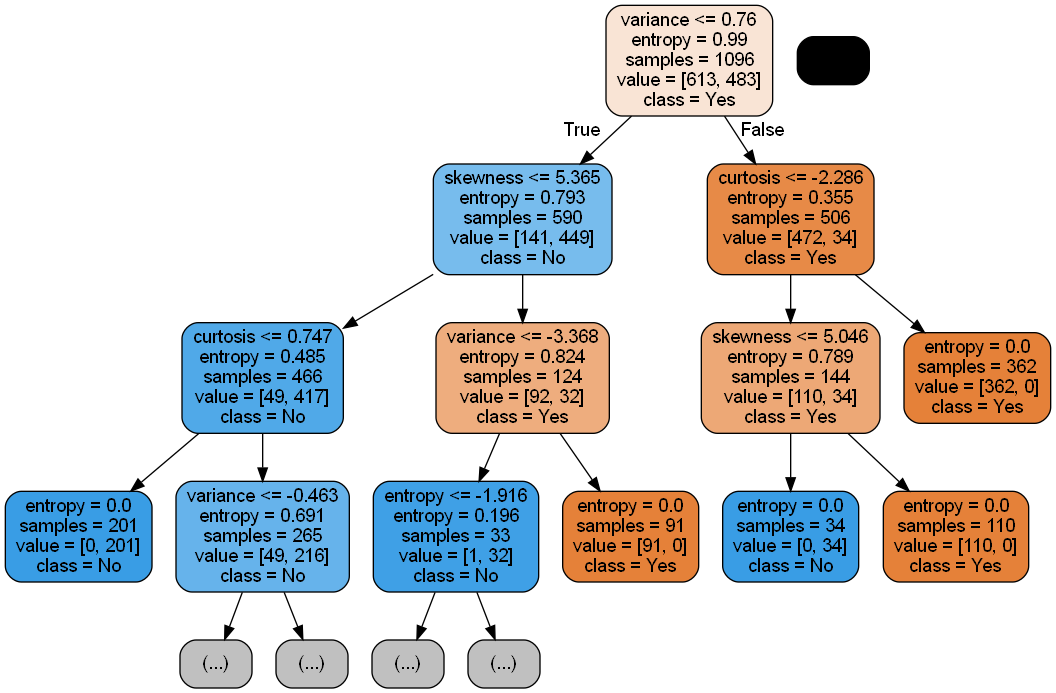

In [28]:
from sklearn import tree
from six import StringIO
from IPython.display import Image
import pydotplus
out_file = tree.export_graphviz(dt_classifier_1, max_depth=3, feature_names=df1.columns[:-1], 
                     class_names = ['Yes', 'No'], filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(out_file)
Image(graph.create_png())

For each of the nodes, the graph shows the partition criterion, the entropy at the node before the partition, the number of samples in each class given the partition and the class assigned to the partition. The stronger a color is in a node, the lower the entropy is, for example, in the leftmost blue node we notice that the entropy is 0 and 201 samples *follow* this path which will assign class 0 to a new sample if it ends up in that node. Interestingly, this model is highly interpretable, it can be explained why it made certain decisions in a simple way.

**Dataset 2**

**Show some examples to illustrate that the method is working properly and provide quantitative evidence for generalization**

In [29]:
dt_classifier_2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier_2.fit(X_2, y_2)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [30]:
# Examples with validation data 
# We will choose the values in the entries number 2, 29 and 59.
test_prediction_2 = dt_classifier_2.predict(X_valid_2[2].reshape(1, -1))
print("Test 1: Predicted value =", test_prediction_2[0], ", Expected result =", y_valid_2[2])
print("------------------- \n")

test_prediction_29 = dt_classifier_2.predict(X_valid_2[29].reshape(1, -1))
print("Test 2: Predicted value =", test_prediction_29[0], ", Expected result =", y_valid_2[29])
print("------------------- \n")

test_prediction_59 = dt_classifier_2.predict(X_valid_2[59].reshape(1, -1))
print("Test 3: Predicted value =", test_prediction_59[0], ", Expected result =", y_valid_2[59])
print("-------------------")

Test 1: Predicted value = 1 , Expected result = 1
------------------- 

Test 2: Predicted value = 1 , Expected result = 1
------------------- 

Test 3: Predicted value = 1 , Expected result = 1
-------------------


In [31]:
# Accuracy for test data 
y_pred_2 = dt_classifier_2.predict(X_test_2)
print(f"The model accuracy for the test data is {accuracy_score(y_test_2, y_pred_2).round(3)*100}%")

The model accuracy for the test data is 90.8%


We can see that the model performed well with the examples and was able to generalize with the new data given.

In [32]:
print("Confusion matrix for test data")
confusion_matrix(y_test_2, y_pred_2)

Confusion matrix for test data


array([[6873,  830],
       [  68, 1981]], dtype=int64)

In [33]:
print(f"The model precision is {precision_score(y_test_2, y_pred_2).round(3)*100}%, "\
      +f"and the model recall is {recall_score(y_test_2, y_pred_2).round(3)*100}%")

The model precision is 70.5%, and the model recall is 96.7%


This model has the lowest precision so far for this data set, it misclassified 830 samples as false positives (the model says the room was occupied when it was not). Depending on the problem to be solved, we could increase this metric but we will risk lowering the recall. Let's see the output tree.

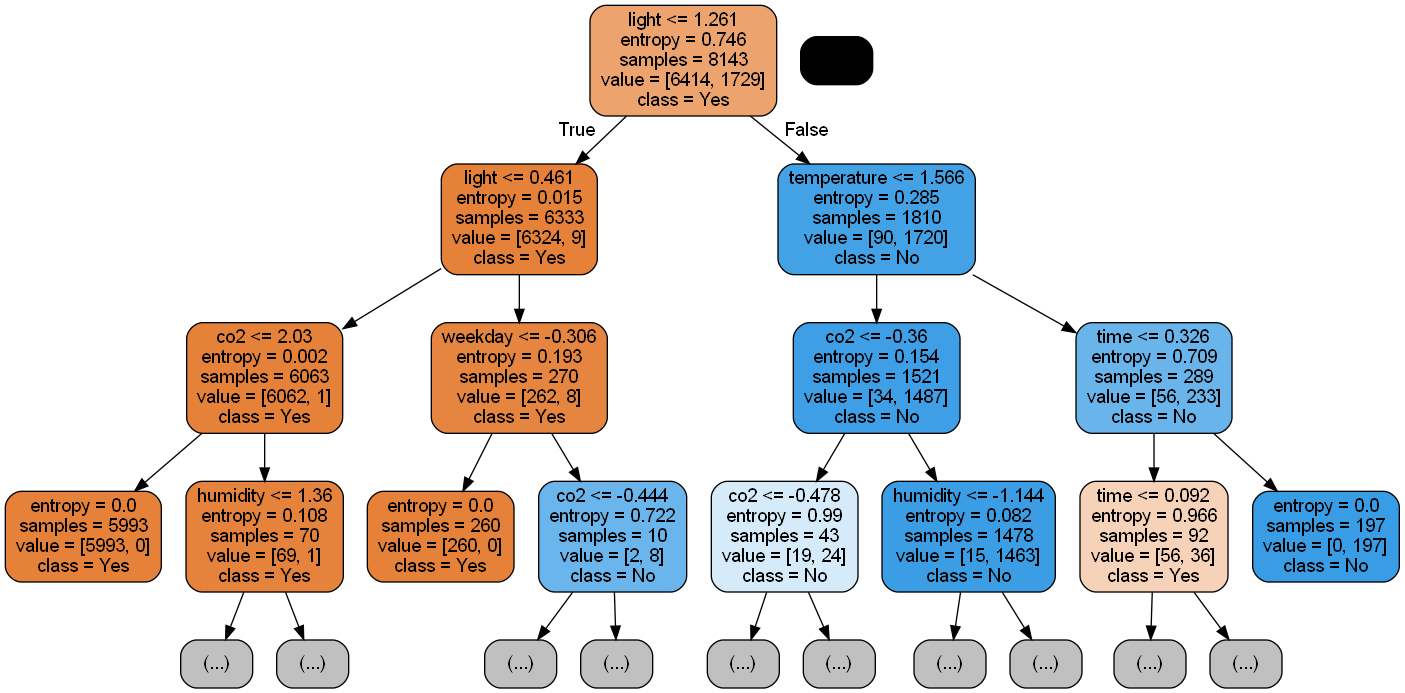

In [34]:
out_file_2 = tree.export_graphviz(dt_classifier_2, max_depth=3, feature_names=df2.columns[:-1], 
                     class_names = ['Yes', 'No'], filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(out_file_2)
Image(graph.create_png())

We can see that the leftmost orange node contains 5993 samples, which corresponds to approximately 73% of the data. Only two of the variables help in this partition which are *light* and *co2*, as we saw in the code assigment 1 these two variables have the highest correlations (91% and 71%, respectively) with our target variable. The other terminal nodes have much fewer samples each (260 and 197, respectively).

## Support Vector Machine with Regularization (Soft Margin)

As we saw in the Code Assigment 1, the idea behind the Support Vector Machine algorithm is to find a hyperplane that maximizes the distance between the two sets of data points and still properly classify each data point. This will only work with linearly separable data, but in most real problems and applications this is not the case. In order to overcome this, a regularization term can be applied to the function we are minimizing in order to find the hyperplane that makes fewer errors but gives the biggest margin between the two sets of data. Mathematically, instead of solving this:
$$
 \min \frac{\lVert \textbf{w} \rVert^{2}}{2}, \text{  such that  } y_{i}(\textbf{x}_{i} \textbf{w} - b) \gt 1, i = 1, ..., N,
$$
where $\textbf{w} \in \mathbb{R}^{d}$ and $b \in \mathbb{R}$, we will be solving the following expression:
$$
 \min \enspace C\lVert \textbf{w} \rVert^{2} + \frac{1}{N}\sum_{i=1}^{N}\text{max}(0, 1-y_{i}\textbf{w}\textbf{x}_{i}-b)),
$$
where $C$ is the regularization term and controls the tradeoff between generalization and precision in the train data.

**Data set 1**

**Show some examples to illustrate that the method is working properly and provide quantitative evidence for generalization**

In [15]:
from sklearn.svm import SVC

# 'kernel = linear' so an hyperplane is the function separating our data, 'C=2' to increase regularization effect
svm_classifier_1 = SVC(C = 2, kernel = 'linear', random_state = 0)
svm_classifier_1.fit(X_1, y_1)

SVC(C=2, kernel='linear', random_state=0)

In [16]:
# We will choose the values in the entries number 2, 13 and 59.
test_prediction_2 = svm_classifier_1.predict(X_valid_1[2].reshape(1, -1)) 
print("Test 1: Predicted value =", test_prediction_2[0], ", Expected result =", y_valid_1[2])
print("-------------------")


test_prediction_13 = svm_classifier_1.predict(X_valid_1[13].reshape(1, -1)) 
print("Test 2: Predicted value =", test_prediction_13[0], ", Expected result =", y_valid_1[13])
print("-------------------")


test_prediction_59 = svm_classifier_1.predict(X_valid_1[59].reshape(1, -1))
print("Test 3: Predicted value =", test_prediction_59[0], ", Expected result =", y_valid_1[59])
print("-------------------")

Test 1: Predicted value = -1 , Expected result = -1
-------------------
Test 2: Predicted value = -1 , Expected result = -1
-------------------
Test 3: Predicted value = -1 , Expected result = -1
-------------------


In [17]:
y_pred_1 = svm_classifier_1.predict(X_test_1)
print(f"The model accuracy is {accuracy_score(y_test_1, y_pred_1).round(3)*100}%")

The model accuracy is 98.6%


As we can see, the model accuracy is very high (near 100%) and the model performed well in the examples from the validation set.

**Data set 2**

**Show some examples to illustrate that the method is working properly and provide quantitative evidence for generalization**

In [18]:
# Soft margin SVM
# 'kernel = linear' so an hyperplane is the function separating our data, 'C=2' to increase regularization effect
svm_classifier_2 = SVC(C = 2, kernel = 'linear', random_state = 0)
svm_classifier_2.fit(X_2, y_2)

SVC(C=2, kernel='linear', random_state=0)

In [19]:
# Examples with validation data 
# We will choose the values in the entries number 2, 29 and 59.
test_prediction_2 = svm_classifier_2.predict(X_valid_2[2].reshape(1, -1))
print("Test 1: Predicted value =", test_prediction_2[0], ", Expected result =", y_valid_2[2])
print("------------------- \n")

test_prediction_29 = svm_classifier_2.predict(X_valid_2[29].reshape(1, -1))
print("Test 2: Predicted value =", test_prediction_29[0], ", Expected result =", y_valid_2[29])
print("------------------- \n")

test_prediction_59 = svm_classifier_2.predict(X_valid_2[59].reshape(1, -1))
print("Test 3: Predicted value =", test_prediction_59[0], ", Expected result =", y_valid_2[59])
print("-------------------")

Test 1: Predicted value = 1 , Expected result = 1
------------------- 

Test 2: Predicted value = 1 , Expected result = 1
------------------- 

Test 3: Predicted value = 1 , Expected result = 1
-------------------


In [20]:
y_pred_2 = svm_classifier_2.predict(X_test_2)
print(f"The model accuracy is {accuracy_score(y_test_2, y_pred_2).round(3)*100}%")

The model accuracy is 99.2%


We can see that the model is good generalizing in the test data with an accuracy of almost 100%, it also performed well in the validation examples. Let's see the confusion matrix and the precision and recall.

In [21]:
print("Confusion matrix for test data")
confusion_matrix(y_test_2, y_pred_2)

Confusion matrix for test data


array([[7628,   75],
       [   5, 2044]], dtype=int64)

In [22]:
print(f"The model precision is {precision_score(y_test_2, y_pred_2).round(3)*100}%, "\
      +f"and the model recall is {recall_score(y_test_2, y_pred_2).round(3)*100}%")

The model precision is 96.5%, and the model recall is 99.8%


The model predicted only 5 false positives but 75 false negatives, the model recall is also greater than the precision. This has been the case for all the models in this assigment.

## K-Nearest Neighbors

The K-Nearest Neighbors (KNN) algorithm is a data classification method for estimating the probabilty that a data point will become a member of one group or another based on what group the data points nearest to it belong to. The KNN algorithm is a type of supervised machine learning algorithm used to solve classification and regression problems. However, it's mainly used for classification problems <cite id="oignh"><a href="#zotero%7C14215332%2FAM8FNT2E">(Joby, n.d.)</a></cite>.

**Dataset 1**

**Show some examples to illustrate that the method is working properly and provide quantitative evidence for generalization**

In [23]:
#Fitting Classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier

# Default number of neighbors is 5, we use metric = 'minkowski' and p = 2 to evaluate the neighbors using the Euclidian
# distance
knn_classifier_1 = KNeighborsClassifier(metric = 'minkowski', p = 2)
knn_classifier_1.fit(X_train_1, y_train_1)

KNeighborsClassifier()

In [24]:
# We will choose the values in the entries number 2, 13 and 59.
test_prediction_2 = knn_classifier_1.predict(X_valid_1[2].reshape(1, -1))
print("Test 1: Predicted value =", test_prediction_2[0], ", Expected result =", y_valid_1[2])
print("-------------------")


test_prediction_13 = knn_classifier_1.predict(X_valid_1[13].reshape(1, -1))
print("Test 2: Predicted value =", test_prediction_13[0], ", Expected result =", y_valid_1[13])
print("-------------------")


test_prediction_59 = knn_classifier_1.predict(X_valid_1[59].reshape(1, -1))
print("Test 3: Predicted value =", test_prediction_59[0], ", Expected result =", y_valid_1[59])
print("-------------------")

Test 1: Predicted value = -1 , Expected result = -1
-------------------
Test 2: Predicted value = -1 , Expected result = -1
-------------------
Test 3: Predicted value = -1 , Expected result = -1
-------------------


In [25]:
y_pred_1 = knn_classifier_1.predict(X_test_1)
print(f"The model accuracy is {accuracy_score(y_test_1, y_pred_1).round(3)*100}%")

The model accuracy is 100.0%


Wow! A perfect accuracy! This has been the best performance of all the models tested for this data set.

**Dataset 2**

**Show some examples to illustrate that the method is working properly and provide quantitative evidence for generalization**

In [26]:
knn_classifier_2 = KNeighborsClassifier(metric = 'minkowski', p = 2)
knn_classifier_2.fit(X_2, y_2)

KNeighborsClassifier()

In [27]:
# Examples with validation data 
# We will choose the values in the entries number 2, 13 and 59.
test_prediction_2 = knn_classifier_2.predict(X_valid_2[2].reshape(1, -1))
print("Test 1: Predicted value =", test_prediction_2[0], ", Expected result =", y_valid_2[2])
print("------------------- \n")

test_prediction_13 = knn_classifier_2.predict(X_valid_2[13].reshape(1, -1))
print("Test 2: Predicted value =", test_prediction_13[0], ", Expected result =", y_valid_2[13])
print("------------------- \n")

test_prediction_59 = knn_classifier_2.predict(X_valid_2[59].reshape(1, -1))
print("Test 3: Predicted value =", test_prediction_59[0], ", Expected result =", y_valid_2[59])
print("-------------------")

Test 1: Predicted value = 1 , Expected result = 1
------------------- 

Test 2: Predicted value = 1 , Expected result = 1
------------------- 

Test 3: Predicted value = 1 , Expected result = 1
-------------------


In [28]:
# Accuracy for test data 
y_pred_2 = knn_classifier_2.predict(X_test_2)
print(f"The model accuracy for the test data is {accuracy_score(y_test_2, y_pred_2).round(3)*100}%")

The model accuracy for the test data is 94.8%


In [29]:
print("Confusion matrix for test data")
confusion_matrix(y_test_2, y_pred_2)

Confusion matrix for test data


array([[7479,  224],
       [ 279, 1770]], dtype=int64)

In [30]:
print(f"The model precision is {precision_score(y_test_2, y_pred_2).round(3)*100}%, "\
      +f"and the model recall is {recall_score(y_test_2, y_pred_2).round(3)*100}%")

The model precision is 88.8%, and the model recall is 86.4%


In this example we can see that the model accuracy is below 90% but the precision and recall are both under that treshold. This is the first model where the recall is lower than precision.

# Results summary
Here we wrap up all the results for all model for both data sets.

### Data set 1 results

| | Accuracy  | 
|---:|:-------------|
| Linear Regression | 96.39%  | 
| Logistic Regression | 99.3%  |
| Decision Tree | 98.6%  | 
| Support Vector Machine - Soft Margin | 98.6%  | 
| K-Nearest Neighbors | **100%** | 

The best accuracy was obtained with the K-Nearest Neighbors algorithm (100%); the lowest accuracy was obtained with the Linear Regression model (96.39%).

### Data set 2 results

| | Accuracy  | Precision | Recall |
|---:|:-------------|:-------------|:-------------|
| Linear Regression | **99.3%**  | **97.3%** | 99.6% |
| Logistic Regression | 98.9%  | **97.3%** | 99.6% |
| Decision Tree | 90.8%  | 70.5% | 96.7% |
| Support Vector Machine - Soft Margin | 99.2%  | 96.5% | **99.8%** |
| K-Nearest Neighbors | 94.8% | 88.8% | 86.4% |

The best accuracy was obtained with the Linear Regression model (99.3%), only surpasing the Support Vector Machine - Soft Margin accuracy by 0.01%. Interestingly, the linear and logistic regression models achieved the same accuracy (97%) for this data set. A similar case happens with these two models with the recall metric, however, the highest recall was obtained by Support Vector Machine - Soft Margin surpassing the previous ones by 0.02% (99.8%). The decision tree model obtained the lowest accuracy (90.8%) and the lowest precision (70.5%), followed by K-Nearest Neighbors which obtained the lowest recall (86.4%).


# Conclusions

1. Although there are different Machine Learning models with different uses, the choice of the correct one depends on the problem to be solved (classification, regression, clustering, among others) and the result to be obtained.

2. As well as the type of model, the evaluation metric depends on what we want to minimize (false positives or false negatives) and the distribution of the data (balanced or unbalanced).

3. It is important to perform an exploratory analysis of the data to understand the nature of the data.

4. If a model is interpretable (e.g. Decision Tree) it is good practice to analyze the resulting model to see how it explains the data.


# Bibliography
<!-- BIBLIOGRAPHY START -->
<div class="csl-bib-body">
  <div class="csl-entry"><i id="zotero|14215332/9BF727W3"></i><i>1.10. Decision Trees</i>. (n.d.). Scikit Learn. <a href="https://scikit-learn.org/stable/modules/tree.html">https://scikit-learn.org/stable/modules/tree.html</a></div>
  <div class="csl-entry"><i id="zotero|14215332/AM8FNT2E"></i>Joby, A. (n.d.). <i>What Is K-Nearest Neighbor? An ML Algorithm to Classify Data</i>. Learn Hub | G2. <a href="https://learn.g2.com/k-nearest-neighbor">https://learn.g2.com/k-nearest-neighbor</a></div>
  <div class="csl-entry"><i id="zotero|14215332/R95D4QQP"></i><i>Logistic Regression in Python</i>. (n.d.). Real Python. <a href="https://realpython.com/logistic-regression-python/">https://realpython.com/logistic-regression-python/</a></div>
  <div class="csl-entry"><i id="zotero|14215332/NIPJUZUQ"></i><i>ML | Linear Regression</i>. (n.d.). GeeksforGeeks. <a href="https://www.geeksforgeeks.org/ml-linear-regression/">https://www.geeksforgeeks.org/ml-linear-regression/</a></div>
  <div class="csl-entry"><i id="zotero|14215332/H8GWFEPK"></i><i>What is logistic regression?</i> (n.d.). IBM. <a href="https://www.ibm.com/topics/logistic-regression">https://www.ibm.com/topics/logistic-regression</a></div>
</div>
<!-- BIBLIOGRAPHY END -->